### Problem 1

In [2]:
# import handy libraries;
import numpy as np
import pandas as pd

In [276]:
# finding informatino from solely a single table, table 1. 

table1 = pd.read_csv("table1.csv")

selection1 = (table1[(table1["occupation"] == "Craft-repair") & (table1["sex"] == "Female") &
             (table1["race"] == "Asian-Pac-Islander")])

print("total number of unique records is: " +str(len(selection1)))
print(selection1['education'].unique())
print(len(selection1['education'].unique()))
print(selection1['marital-status'].unique())
print(len(selection1['marital-status'].unique()))
selection1

total number of unique records is: 14
['Masters' 'HS-grad' 'Bachelors' 'Some-college' 'Assoc-acdm' '11th']
6
['Married-civ-spouse' 'Widowed' 'Divorced' 'Married-spouse-absent'
 'Never-married']
5


,age,occupation,education,education-num,marital-status,race,sex
920,59,Craft-repair,Masters,14,Married-civ-spouse,Asian-Pac-Islander,Female
4804,49,Craft-repair,HS-grad,9,Widowed,Asian-Pac-Islander,Female
9600,33,Craft-repair,HS-grad,9,Divorced,Asian-Pac-Islander,Female
10084,28,Craft-repair,Bachelors,13,Married-spouse-absent,Asian-Pac-Islander,Female
10476,22,Craft-repair,Some-college,10,Never-married,Asian-Pac-Islander,Female
11961,25,Craft-repair,Some-college,10,Never-married,Asian-Pac-Islander,Female
12627,26,Craft-repair,Assoc-acdm,12,Married-spouse-absent,Asian-Pac-Islander,Female
14697,20,Craft-repair,11th,7,Married-spouse-absent,Asian-Pac-Islander,Female
16440,37,Craft-repair,HS-grad,9,Divorced,Asian-Pac-Islander,Female
16742,22,Craft-repair,Some-college,10,Never-married,Asian-Pac-Islander,Female


By using only tale 1, the user is able to narrow the search down to 14 seperate individuals. These individuals are part of 6 unique education levels and 5 unique marital statuses. 

In [274]:
# combining the primary table to the second table 

table2 = pd.read_csv("table2.csv")

selection2 = (table2[(table2["occupation"] == "Craft-repair") & (table2["sex"] == "Female") &
             (table2["race"] == "Asian-Pac-Islander") & (table2['native-country'] == 'Philippines')])
selection2
#table2

,age,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
29431,59,Craft-repair,Asian-Pac-Islander,Female,0,0,35,Philippines,<=50K


Alone, table 2 doesnt provide the analyst with any useful information about this person, however, it does provide theri age, which can be corss referenced with table 1 to return a single unique individual who obtained a masters degree and has a Married-civ-spouse marital status. On their own, neighter of the tables allowed this person to be found, however, together they allowed a user to isolate this one person. 

### Problem 2

Experimenting with **k-anomity, i-diversity, and t-closeness**. 

Consider a dataset, for example, with 3 ordinary attributes and 1 sensitive attribute. Let the 3 ordinary attributes be Age, Sex, and Education and the sensitive attribute be Income, each row in this dataset is of the form:

$$
    [Age, Sex, Education, Income]
$$

A hacker is interested in knowing the sensitive attribute Income. When the dataset is designed so that if complies with either **k-anomity**, **i-diversity**, and/or **t-closeness**, even if he or she somehow figures out the values of the three, the hacker may not retrive the sensitive information accurately. In general, **k-anomity** is weaker than **i-diversity**, which, in turn, is weaker than **t-closeness**.

By definition, **k-anomity** means that there is at least **k** different rows in the table of which ordinary values are a particular combination of Age, Sex, and Education. For example, the hacker knows the information of the person of interest is Age = 31, Sex = Female, and Education = BS. He or she looks into the data table and found that there are 3 rows with that combination:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=70k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

The hacker cannot tell accurately what the income of the person is because it can be one of the 3 values shown. This particular combination of information has 3-anomity. If every combination corresponds to at least 3 rows, then the dataset has 3-anomity.

a) Let's look at the dataset **"table3.csv"**, a simplified version of **"table1.csv"** from problem 1. Let the sensitive attribute be **education** and others be ordinary attributes. Calculate the anomity of the dataset (the value **k**). First, find all the posible combinations of the ordinary attributes that exists in the dataset. After that, determine the anomity for each combination. The anomity of the dataset is the smallest anomity among the combinations.

In [107]:
table3 = pd.read_csv("table3.csv")

table3 = table3.drop(['Unnamed: 0'], axis=1)

#finding all unique vlaues. 
def uniquec(attribute):
    cnt = 0
    lst = []
    
    for i in range(0, len (attribute)):
        if attribute [i] not in lst:
            lst.append(attribute[i])
            cnt +=1
    print("# of unique values :", cnt)
    print("each unique value :", lst)
    
print(uniquec(table3['age']))
print(uniquec(table3['education']))
print(uniquec(table3['race']))
print(uniquec(table3['sex']))

# of unique values : 73
each unique value : [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47, 46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58, 26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82, 83, 84, 85, 86, 87]
None
# of unique values : 16
each unique value : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
None
# of unique values : 5
each unique value : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
None
# of unique values : 2
each unique value : ['Male', 'Female']
None


In [104]:
# conducting unique vlaue EDA
mytale = table3.groupby(['age', 'race', 'sex']).size()
mytale # we know there are 546 unique values 

age  race                sex   
17   Amer-Indian-Eskimo  Female     2
                         Male       1
     Asian-Pac-Islander  Female     2
     Black               Female    15
                         Male      19
                                   ..
90   Asian-Pac-Islander  Male       5
     Black               Female     2
                         Male       2
     White               Female    12
                         Male      22
Length: 546, dtype: int64

In [220]:
# agrregating the data, 
tale2 = table3.groupby(['age', 'race', 'sex']).size().reset_index().rename(columns={0:'count'})

tale2['age'] = tale2['age'].apply(str)
# turn tale2 into a dictionary

# begin by reshaping dataframe
tale2['key'] = tale2['race'] +  tale2["sex"] + tale2['age']
tale2new = tale2.drop(['race', 'sex', 'age'], axis =1)

# cast this into a dictionary!
kdict = tale2new.set_index('key')['count'].to_dict()
keyMin = min(kdict.keys(), key = (lambda k: kdict[k]))
# find the min value in the dictionary:
print('Minimum key value for k is: ' , kdict[keyMin])
print('this means that the total anomity for the datset is 1.') 

Minimum key value for k is:  1
this means that the total anomity for the datset is 1.


We can improve the **k-anomity** of the dataset by "suppressing" the ordinary attributes. Suppressing means reducing the resolution of the attribute's value. For this problem, let's suppress Age by replacing the exact age with an age range. For example, instead of leaving age = 32, replace it with age = 30-40. Apply this to **"table3.csv"** with the ranges {<20, 20-30, 30-50, >50}. Check if the anomity improves. 

In [246]:
#will abstract this data building off the dataframe "tale2"
age = table3["age"].unique()
#print(sorted(age)) # here we get that the min is 17 and the max is 90

# we will bin the ages in the column 'age', by 10-20, 20-30, 30-40 etc:
bins = [-np.inf, 11, 19, 29, 39, 49, 59, 69, 79, 89, np.inf]
agebins = [0, '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
table3['ageRange'] = pd.cut(table3['age'], bins=bins, labels=agebins)


# agrregating the data, 
suppresedTable = table3.groupby(['ageRange', 'race', 'sex']).size().reset_index().rename(columns={0:'count'})

suppresedTable['ageRange'] = suppresedTable['ageRange'].astype(str)
# turn tale2 into a dictionary

# begin by reshaping dataframe
suppresedTable['key'] = suppresedTable['race'] +  suppresedTable["sex"] + suppresedTable['ageRange']
tale3new = suppresedTable.drop(['race', 'sex', 'ageRange'], axis =1)

# cast this into a dictionary!
kdictsuppressed = tale3new.set_index('key')['count'].to_dict()
print(type(kdictsuppressed))
# remove keys that have valeus == to 0. 
kdict2 = {k:v for k,v in kdictsuppressed.items() if v != 0}
keyMin = min(kdict2.keys(), key = (lambda k: kdict2[k]))
# find the min value in the dictionary:
print('Minimum key value for k is: ' , kdict2[keyMin])
print('this means that the total anomity for the datset is 1.') 

print(min(kdict2, key=kdict2.get))

print('despite best efforts, the k-anonimity of the dataset couldnt be imporved because there is still only one lady lady who identifies as other ethnicity in the 60s age bracket which makes her still identifiable and entire  anomity of the dataset still =1')

<class 'dict'>
Minimum key value for k is:  1
this means that the total anomity for the datset is 1.
OtherFemale60s
despite best efforts, the k-anonimity of the dataset couldnt be imporved because there is still only one lady lady who identifies as other ethnicity in the 60s age bracket which makes her still identifiable and entire  anomity of the dataset still =1


**K-anomity** is nice, however, it fails in many cases. If the rows which share a combination of ordinary attributes have only a few values for the sensitive attribute, then it is not much better than having no anomity at all. For example, consider:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

When **k-anomity** fails in the second case, **i-diversity** comes to the rescue. **I-diversity** states that the rows of a particular combination of information must have at least i different values for the sensitive attribute. The above example has 2-diversity, which is not good. 

b) Calculate the diversity of the dataset **"table3.csv"**. Follow similar steps as in part a. 

In [219]:
# instead of counting, the number of unique education values is given. 
grouped = table3.groupby(['age', 'race', 'sex']).nunique().reset_index().drop(['ageRange'], axis=1)#.rename(columns={0:'count'})

# cast age to str
grouped['age'] = grouped['age'].apply(str)

# begin by reshaping dataframe
grouped['key'] = grouped['race'] +  grouped["sex"] + grouped['age']
groupednew = grouped.drop(['race', 'sex', 'age'], axis =1)

# creating dictionary
idict = groupednew.set_index('key')['education'].to_dict()
ikeyMin = min(idict.keys(), key = (lambda k: idict[k]))
ikeyMax = max(idict.keys(), key = lambda k: idict[k])
# find the min value in the dictionary:
print('Minimum key value for k is: ' , idict[ikeyMin])
print('Maximum key value for k is: ' , idict[ikeyMax])
print('this means that the total anomity for the datset is 1.') 

# we can tell that the unique values were searched correctly becuase the max number of unique values for education is returned as 16. 

Minimum key value for k is:  1
Maximum key value for k is:  16
this means that the total anomity for the datset is 1.


Suppressing an attribute can also improve the **i-diversity** of the dataset. Repeat the suppression as in **part a** and check if the diversity improves. If it does not, consider further suppress age by using the range {<20, 20-50, >50}.

In [252]:
# repeating suppression to see if diversity improves (it won't)
# agrregating the data, 
idsupress = table3.groupby(['ageRange', 'race', 'sex']).nunique().reset_index().drop(['age'], axis=1)#.rename(columns={0:'count'})
# cast ageRange to str type
idsupress['ageRange'] = idsupress['ageRange'].astype(str)

# begin by reshaping dataframe
idsupress['key'] = idsupress['race'] +  idsupress["sex"] + idsupress['ageRange']
idnew = idsupress.drop(['race', 'sex', 'ageRange'], axis =1)

# cast this into a dictionary!
id2 = idnew.set_index('key')['education'].to_dict()

idict2 = {k:v for k,v in id2.items() if v != 0}
ikeyMin = min(idict2.keys(), key =(lambda k: idict2[k]))
ikeyMax = max(idict2.keys(), key = lambda k: idict2[k])
# find the min value in the dictionary:
print('Minimum key value for k is: ' , idict2[ikeyMin])
print('Maximum key value for k is: ' , idict2[ikeyMax])
print('this means that the total anomity for the datset is 1.')
print('the smallest i diverse value here is still one because there are multiple age ranges where only one type of education exists. ')

Minimum key value for k is:  1
Maximum key value for k is:  16
this means that the total anomity for the datset is 1.
the smallest i diverse value here is still one because there are multiple age ranges where only one type of education exists. 


**T-closeness** is even better than **i-diversity**. **T-closeness** requires that for every combination of information, the distribution of the sensitive attribute's value among the corresponding rows must be close to the overall distribution of the sensitive attribute's value for the whole dataset. Distance between distribution is calculated using the Earth Mover Distance (EMD). The dataset has **t-closeness** if no distance exceeds **t**. 

c) Calculate the overall distribution of **education**. Find the **t-closeness** of the dataset (largest distance between any combination's distribution of marital-status and the overall distribution).

You can use **scipy.stats.wasserstein_distance** to calculate the EMD.

In [339]:
# google what wasserstein distance is
# t-closeness:
from scipy.stats import wasserstein_distance

comparison = table3['education'].value_counts(normalize = True)

tid = table3.groupby(['ageRange', 'race', 'sex']).nunique()#'])#.nunique().reset_index().drop(['age'], axis=1)
tid = tid.iloc[10:]
tclose= tid['education'].value_counts()
wasserstein_distance(comparison, tclose)

5.231617647058823

### Problem 3:

consult attached images to this piece for problem #3. .

### Problem 4 

There are 2 regression datasets given to you: "group1.csv" and "group2.csv". Both have 2 attributes and no label. Load them and store them in $X_1$ and $X_2$, respectively. 

In [279]:
X1 = pd.read_csv("group1.csv", header = None)
X2 = pd.read_csv("group2.csv", header = None)

a) Run Linear Regression on each of the datasets. Are the coefficients positive or negative? Provide a plot for each dataset. 

In [280]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

def yAxBline(A, B):
    '''draws a line over the scatterplot that takes
    the line's slope and intercept as arguments'''
    getaxis = plt.gca()
    x = np.array(getaxis.get_xlim())
    y = B + A * x
    plt.plot(x, y, '--')

In [284]:
# running the linear regression
X1_ = np.array(X1)
X2_ = np.array(X2)
####
X1x = X1_[:,0].reshape(-1, 1)
X1y = X1_[:,-1].reshape(-1, 1)
####

X2x = X2_[:,0].reshape(-1, 1)
X2y = X2_[:,-1].reshape(-1, 1)


lin1 = LinearRegression()
lin2 = LinearRegression()
lin1 = lin1.fit(X1x, X1y)
lin2 = lin2.fit(X2x, X2y)
# first linear regression:
a,b = lin1.coef_, lin1.intercept_
m,y = lin2.coef_, lin2.intercept_
print(lin1.coef_, lin1.intercept_)
print(lin2.coef_, lin2.intercept_)

[[0.89717851]] [3.22957338]
[[1.15339068]] [-4.95991444]


Text(0.5, 1.0, 'group1 plotted with regression line')

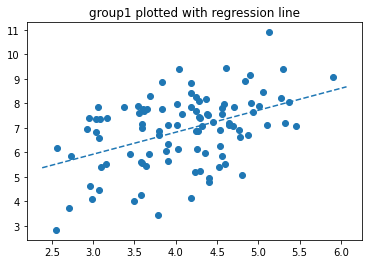

In [291]:
# plotting the first group
plt.scatter(X1x, X1y)
yAxBline(0.89717851, 3.22957338)
plt.title('group1 plotted with regression line')

Text(0.5, 1.0, 'group2 plotted with regression line')

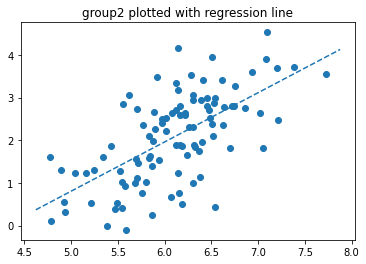

In [292]:
# plotting the second group
plt.scatter(X2x, X2y)
yAxBline(1.15339068, -4.95991444)
plt.title('group2 plotted with regression line')

b) Now combine both datasets into a single large dataset. Call this dataset $X$ ($X=X_1 \cup X_2$). Again, run Linear Regression on the combined dataset $X$. Is the coefficient positive or negative? Provide a plot. 

In [96]:
frames = [X1, X2]
X  = pd.concat(frames)
X
###
X = np.array(X)
###
Xx = X[:,0].reshape(-1, 1)
Xy = X[:,-1].reshape(-1, 1)
###
linX = LinearRegression()
linX = linX.fit(Xx, Xy)
print(linX.coef_, linX.intercept_)
print("the slope of the coefficient of the union is negative.")

[[-1.38439504]] [11.52877464]
the slope of the coefficient of the union is negative.


Text(0.5, 1.0, 'plotting the two datasets together to illustrate Simpsons paradox')

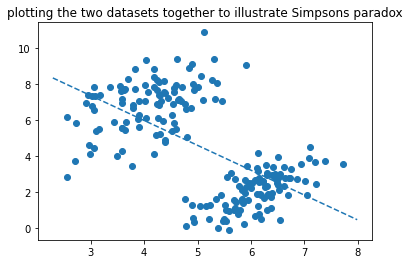

In [293]:
plt.scatter(Xx, Xy)
yAxBline(-1.38439504, 11.52877464)
plt.title('plotting the two datasets together to illustrate Simpsons paradox')

c) What is the name of this illustrated paradox? What do the above results tell us about modeling the relationship between two variables in the presence of a missing attribute? To give you some intuition, imagine there is a third unobserved attribute $Z$ that has different values depending on which group an example belongs to. In other words, every data point in $X_1$ has $Z=1$ and every data point in $X_2$ has $Z=2$. Attribute $Z$ essentially partitions the whole dataset $X$ into 2 subsets $X_1$ and $X_2$.  

Question 4 Part C Answers:

The illustrated paradox is called Simpson's paradox. The Simpson's paradox either reverses or makes trends from different datasets with similar trends disappear when those datasets are combined. This has occured here in problem #4. 

These results indicate that without the key attribute Z, it will impossible to model the relationship between the variables in the seperate datasets. This is becuase the hypothetical attribute Z partitions dataset X into X1 and X2. In Simpson's paradox, a model can contrive an equation for the missing attribute which would help resolve the paradox, resolving the paradox can be done wither through intervention in the real world, through the front door method which creates a third attribute that describes the casual relationship, or through the back door method which would meet the criterai that Z blocks the casual apths between X1 and X2. 

### Problem 5:

consult attached images to this piece for problem #5. .